# Colx 581 Lab 2: Delexicalized Parsing for North Sami

In this lab, we will experiment with delexicalized parsing for North Sami which is one of the Sami languages spoken in the northern parts of Finland, Norway and Sweden. You're given a small training set of dependency parsed North Sami sentences from the North Sami Universal Dependencies treebanks. You'll first build a conventional dependency parser using this dataset and evaluate the parser on a test set. You will then train a delexicalized parser on the same dataset which should improve results. Finally, you will combine this dataset with (1) English, (2) Finnish and (3) Japanese dependency annotated data and observe how this impacts results.

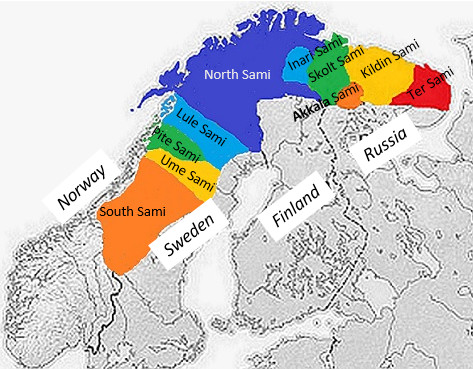

In [38]:
from IPython.display import Image
Image("SAMI-MAP.jpg")

## Assignment 1: Data handling

The data format in Universal Dependencies datasets is explained [here](https://universaldependencies.org/format.html). You need to convert this into the data format used by spaCy. You will first write a function to convert data from UD format to spacy format and then write a function to read data from disk. 

### Assignment 1.1: Converting trees into spaCy format

rubric={"accuracy":5}

Your first task is to write a function `get_spacy_tree` which converts UD dependency trees in a list format into spaCy format. The list format looks like this:

```
[['1', 'Golbma', 'golbma', 'NUM', 'Num', 'Case=Nom|Number=Sing|NumType=Card', '5', 'nummod', '_', '_']
['2', 'čáppa', 'čáppat', 'ADJ', 'A', '_', '5', 'amod', '_', 'SpaceAfter=No']
['3', ',', ',', 'PUNCT', 'CLB', '_', '6', 'punct', '_', '_']
['4', 'doaimmalaš', 'doaimmalaš', 'ADJ', 'A', '_', '5', 'amod', '_', '_']
['5', 'nieidda', 'nieida', 'NOUN', 'N', 'Case=Gen|Number=Sing', '6', 'nsubj', '_', '_']
['6', 'livžo', 'livžut', 'VERB', 'V', 'Mood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin', '0', 'root', '_', '_']
['7', 'áhčiset', 'áhčči', 'NOUN', 'N', 'Case=Gen|Number=Sing|Number[psor]=Plur', '8', 'nmod:poss', '_', '_']
['8', 'riegádanbeaivve', 'riegádanbeaivi', 'NOUN', 'N', 'Case=Gen|Number=Sing', '6', 'obl', '_', 'SpaceAfter=No']
['9', '.', '.', 'PUNCT', 'CLB', '_', '6', 'punct', '_', '_']]
```
Each element in the list contains 10 fields corresponding to the 10 fields in a UD parse tree. You should convert this into a spaCy tree in the following format:

```
(
'Golbma čáppa , doaimmalaš nieidda livžo áhčiset riegádanbeaivve .', 
{'heads': [4, 4, 5, 4, 5, 5, 7, 5, 5], 
 'tags': ['NUM', 'ADJ', 'PUNCT', 'ADJ', 'NOUN', 'VERB', 'NOUN', 'NOUN', 'PUNCT'], 
 'deps': ['nummod', 'amod', 'punct', 'amod', 'nsubj', 'root', 'nmod:poss', 'obl', 'punct']}
)
```



Note the following key-differences between spaCy and UD trees:
1. In a UD tree the indexing of tokens starts from 1 whereas the indexing starts from 0 in a spaCy tree. This means that you will need to change the values in `'heads'`.
1. **The root of a UD tree has head `0` but in a spaCy tree, the root is its own head.**

Please write three meaningful tests for your function. Print the output for each test case and check by eye that it follows the format above. You can then write assertions:

```
assert(SPACY_TREE == get_spacy_tree(UD_TREE))
```

It's a good idea to start by writing the tests and implement your function afterwards.

1. `UD`:
```
# sent_id = 1053
# text = Golbma čáppa, doaimmalaš nieidda livžo áhčiset riegádanbeaivve.
1       Golbma  golbma  NUM     Num     Case=Nom|Number=Sing|NumType=Card       5       nummod  _       _
2       čáppa   čáppat  ADJ     A       _       5       amod    _       SpaceAfter=No
...
```

2. `read_data` from files (Ex 1.2):
```
[['1', 'Golbma', 'golbma', 'NUM', 'Num', 'Case=Nom|Number=Sing|NumType=Card', '5', 'nummod', '_', '_']
['2', 'čáppa', 'čáppat', 'ADJ', 'A', '_', '5', 'amod', '_', 'SpaceAfter=No']
...]
```

3. `get_spacy_tree` from `read_data` (Ex 1.1):
```
(
'Golbma čáppa , doaimmalaš nieidda livžo áhčiset riegádanbeaivve .', 
{'heads': [4, 4, 5, 4, 5, 5, 7, 5, 5], 
 'tags': ['NUM', 'ADJ', 'PUNCT', 'ADJ', 'NOUN', 'VERB', 'NOUN', 'NOUN', 'PUNCT'], 
 'deps': ['nummod', 'amod', 'punct', 'amod', 'nsubj', 'root', 'nmod:poss', 'obl', 'punct']}
)
```

In [40]:
import os

# These constants give the index of token ID, word forms, syntactic heads, POS tags, 
# dependencies and MISC information in a UD file. Please use the named constants to make
# your code more legible.
ID_INDEX=0
WORD_INDEX=1
HEAD_INDEX=6
POS_INDEX=3
DEP_INDEX=7
MISC_INDEX=9

def get_spacy_tree(tree):
    # your code here
    spacy_tree = ( YOUR_SENTENCE,   # by joining all items from the 1st column; 
                  {"heads": ...,    # getting a list of head from the 6th;
                   "tags":...,      # getting a list of POS from the 3th; 
                   "deps":...,      # getting a list of deprel from the 7th; 
                   })
    
    
    # FOR "heads", you need to heads = heads - 1 if not a root, heads = index if a root; 
    # your code here

    # your code here
    return spacy_tree

# Write three tests for your get_spacy_tree function

# your code here

# your code here

### Assignment 1.2: Reading UD trees from disk

rubric={"accuracy":5}

The directory `Lab2/data` contains North Sami, English, Finnish and Japanese training, development and test data for dependency parsing in UD format. Consecutive trees are separated by a blank line. 

This is a tree from the North Sami training file:

```
# sent_id = 1053
# text = Golbma čáppa, doaimmalaš nieidda livžo áhčiset riegádanbeaivve.
1       Golbma  golbma  NUM     Num     Case=Nom|Number=Sing|NumType=Card       5       nummod  _       _
2       čáppa   čáppat  ADJ     A       _       5       amod    _       SpaceAfter=No
3       ,       ,       PUNCT   CLB     _       6       punct   _       _
4       doaimmalaš      doaimmalaš      ADJ     A       _       5       amod    _       _
5       nieidda nieida  NOUN    N       Case=Gen|Number=Sing    6       nsubj   _       _
6       livžo   livžut  VERB    V       Mood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin   0   root  _   _
7       áhčiset áhčči   NOUN    N       Case=Gen|Number=Sing|Number[psor]=Plur   8   nmod:poss     _       _
8       riegádanbeaivve riegádanbeaivi  NOUN    N  Case=Gen|Number=Sing    6   obl     _    SpaceAfter=No
9       .       .       PUNCT   CLB     _       6       punct   _       _
```

You should write a function `read_data` which reads trees into the list format which is used as input for `get_spacy_tree` and then calls `get_spacy_tree` for each tree. 

The `read_data` function takes two arguments: a `language` (`north-sami`, `english`, `finnish` or `japanese`) and a `split` (`train`, `dev` or `test`) and returns a list of spacy trees.

There are a couple of special notations in the UD treebanks which you need to observe: The English treebank sometimes inserts words into the dependency trees to facilitate parsing:

```
# sent_id = weblog-blogspot.com_healingiraq_20040409053012_ENG_20040409_053012-0022
# text = Over 300 Iraqis are reported dead and 500 wounded in Fallujah alone.
1       Over    over    ADV     RB      _       2       advmod  2:advmod        _
2       300     300     NUM     CD      NumType=Card    3       nummod  3:nummod        _
3       Iraqis  Iraqis  PROPN   NNPS    Number=Plur     5       nsubj:pass    _  _
4       are     be      AUX     VBP     Mood=Ind|Tense=Pres|VerbForm=Fin   5  aux:pass  5:aux:pass    _
5       reported        report  VERB    VBN     Tense=Past|VerbForm=Part|Voice=Pass  0  root  0:root  _
6       dead    dead    ADJ     JJ      Degree=Pos      5       xcomp   5:xcomp _
7       and     and     CCONJ   CC      _       8       cc      8:cc|8.1:cc     _
8       500     500     NUM     CD      NumType=Card    5   conj    5:conj:and|8.1:nsubj:pass|9:nsubj:xsubj _
8.1     reported        report  VERB    VBN     Tense=Past|VerbForm=Part|Voice=Pass  _  _  5:conj:and  CopyOf=5
9       wounded wounded ADJ     JJ      Degree=Pos      8       orphan  8.1:xcomp       _
10      in      in      ADP     IN      _       11      case    11:case _
11      Fallujah        Fallujah        PROPN   NNP     Number=Sing     5       obl     5:obl:in        _
12      alone   alone   ADV     RB      _       11      advmod  11:advmod       SpaceAfter=No
13      .       .       PUNCT   .       _       5       punct   5:punct _
```

Here token `8.1` is not part of the original sentence but is in fact a copy of token `5`. You should filter out these inserted tokens before calling `get_spacy_tree`. You can recognize them by the `.` in the ID field. The Finnish treebank contains a similar feature:

```
# sent_id = b201.46
# text = Ellei kipu katoa loppuviikosta, pitää tilata aika lääkärille.:/
1-2     Ellei   _       _       _       _       _       _       _       _
1       Jos     jos     SCONJ   C       _       4       mark    4:mark  _
2       ei      ei      AUX     V       Number=Sing|Person=3|Polarity=Neg|VerbForm=Fin  4  aux  4:aux   _
3       kipu    kipu    NOUN    N       Case=Nom|Number=Sing    4       nsubj   4:nsubj _
4       katoa   kadota  VERB    V       Connegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin   8  advcl  8:advcl _
5       loppuviikosta   loppu#viikko    NOUN    N       Case=Ela|Number=Sing   4   obl  4:obl   SpaceAfter=No
6       ,       ,       PUNCT   Punct   _       4       punct   4:punct _
7       pitää   pitää   AUX     V       Mood=Ind|Number=Sing|Person=0|Tense=Pres|VerbForm=Fin 8  aux 8:aux   _
8       tilata  tilata  VERB    V       InfForm=1|Number=Sing|VerbForm=Inf    0       root    0:root  _
9       aika    aika    NOUN    N       Case=Nom|Number=Sing    8       obj     8:obj   _
10      lääkärille      lääkäri NOUN    N       Case=All|Number=Sing    9       nmod    9:nmod  SpaceAfter=No
11      .       .       PUNCT   Punct   _       8       punct   8:punct SpaceAfter=No
12      :/      :/      SYM     Symb    _       8       discourse       8:discourse     _
```

The contraction `Ellei` which is token `1-2` in the tree has been split into two tokens `1` `Jos` and `2` `ei`. In this case, you should filter out the original contraction and preserve just tokens `1` and `2`. You can recognize contractions by the fact that they contain a hyphen `-`. 

Please write three meaningful tests for your `read_data` function. You can utilize the [io.StringIO](https://docs.python.org/3/library/io.html#io.StringIO) Python library to simulate reading from a file. It's probably a good idea to test English trees with inserted tokens and Finnish trees with contractions. It's a good idea to test inserted tokens in the English treebank and contractions in the Finnish treebank.

In [41]:
def read_data(file):
    data = []
    # your code here
    tree = []
    
    for line in open(file):
        line = line.strip("\n")

        # if line is not empty, 
        #   if line starts with "#", pass; 
        #   elif line contains . or "-" in the first column, pass; 
        #   else append to tree; 
        # if line is empty == EOS, then, `get_spacy_tree(tree)` & tree = []; 


    # your code here
    return data

# Write three tests for your get_spacy_tree function

# your code here

# your code here

You should now read the North Sami, English, Finnish and Japanese train, development and test sets. You need to copy the `data` directory from the course repo (`https://github.ubc.ca/MDS-CL-2020-21/COLX_581_low-resource_students/tree/master/blank_labs/Lab2/data`) into your lab directory before running this code.

In [5]:
import os

north_sami_train_data = read_data(os.path.join("data","north-sami-train"))
north_sami_dev_data = read_data(os.path.join("data","north-sami-dev"))
north_sami_test_data = read_data(os.path.join("data","north-sami-test"))

english_train_data = read_data(os.path.join("data","english-train"))
english_dev_data = read_data(os.path.join("data","english-dev"))
english_test_data = read_data(os.path.join("data","english-test"))

finnish_train_data = read_data(os.path.join("data","finnish-train"))
finnish_dev_data = read_data(os.path.join("data","finnish-dev"))
finnish_test_data = read_data(os.path.join("data","finnish-test"))

japanese_train_data = read_data(os.path.join("data","japanese-train"))
japanese_dev_data = read_data(os.path.join("data","japanese-dev"))
japanese_test_data = read_data(os.path.join("data","japanese-test"))

### Assignment 1.3: Delexicalization

rubric={"accuracy":3}

You should now delexicalize trees using a function `delexicalize`. It takes a list of spacy dependency trees as input and returns delexicalized trees where word tokens have been replaced by POS tags. As an example consider the following input:

```
('Golbma čáppa , doaimmalaš nieidda livžo áhčiset riegádanbeaivve .', 
 {'heads': [4, 4, 5, 4, 5, 5, 7, 5, 5], 
  'tags': ['NUM', 'ADJ', 'PUNCT', 'ADJ', 'NOUN', 'VERB', 'NOUN', 'NOUN', 'PUNCT'], 
  'deps': ['nummod', 'amod', 'punct', 'amod', 'nsubj', 'root', 'nmod:poss', 'obl', 'punct']})
```

Your function should return:
```
('NUM ADJ PUNCT ADJ NOUN VERB NOUN NOUN PUNCT', 
 {'heads': [4, 4, 5, 4, 5, 5, 7, 5, 5], 
  'tags': ['NUM', 'ADJ', 'PUNCT', 'ADJ', 'NOUN', 'VERB', 'NOUN', 'NOUN', 'PUNCT'], 
  'deps': ['nummod', 'amod', 'punct', 'amod', 'nsubj', 'root', 'nmod:poss', 'obl', 'punct']})
```

Please write one test for your `delexicalize` function.

In [6]:
def delexicalize(data):
    result = []
    # your code here
    
    # Instead of joining all items from the 1st column,
    # joining all itmes in `tags` for your sentence; 

    # your code here
    return result

# Write one test for your delexicalize function

# your code here

# your code here

You should now delexicalize the North Sami, English, Finnish and Japanese train, development and test sets:

In [7]:
delex_english_train_data = delexicalize(english_train_data)
delex_english_dev_data = delexicalize(english_dev_data)
delex_english_test_data = delexicalize(english_test_data)

delex_finnish_train_data = delexicalize(finnish_train_data)
delex_finnish_dev_data = delexicalize(finnish_dev_data)
delex_finnish_test_data = delexicalize(finnish_test_data)

delex_japanese_train_data = delexicalize(japanese_train_data)
delex_japanese_dev_data = delexicalize(japanese_dev_data)
delex_japanese_test_data = delexicalize(japanese_test_data)

delex_north_sami_train_data = delexicalize(north_sami_train_data)
delex_north_sami_dev_data = delexicalize(north_sami_dev_data)

### Assignment 1.4: Projectivization

rubric={"accuracy":3}

Many of the trees in the North Sami dataset are non-projective. Consider for example the following parse tree:
```
('Golbma čáppa , doaimmalaš nieidda livžo áhčiset riegádanbeaivve .',
 {'heads': [4, 4, 5, 5, 5, 5, 7, 5, 5],
  'tags': ['NUM', 'ADJ', 'PUNCT', 'ADJ', 'NOUN', 'VERB', 'NOUN', 'NOUN', 'PUNCT'],
  'deps': ['nummod', 'amod', 'punct', 'amod', 'nsubj', 'root', 'nmod:poss', 'obl', 'punct']})
```

As you can see below, this tree has crossing dependency arcs (dependency arrows point toward the dependent):

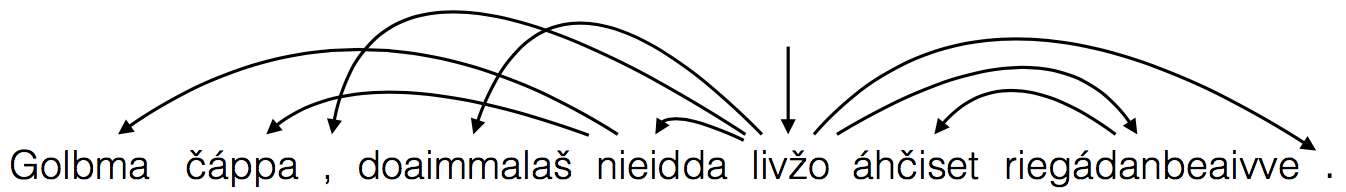

In [8]:
from IPython.display import Image
Image("deptree.png")

SpaCy can't directly use non-projective trees during training but the library ships with a function for projectivization of non-projective trees [projectivize()](https://github.com/explosion/spaCy/blob/b7ba7f78a28ef71fca60415d0165e27a058d1946/spacy/pipeline/_parser_internals/nonproj.pyx). The function is imported below as `spacy_projectivize` (if you are using SpaCy v2, you'll need to change the import slightly).  Implement a function `projectivize` which takes a list of spacy trees as input and projectivizes them. The function should return the list of projectivized spaCy sependency trees.

- Peudo-projective https://aclanthology.org/P05-1013/ based on http://www.aclweb.org/anthology/P98-1106
- Attardi's algorithm https://aclanthology.org/W06-2922/
- Arc-standard with swap https://aclanthology.org/P09-1040/

In [9]:
from spacy.pipeline._parser_internals.nonproj import projectivize as spacy_projectivize

# Uncomment this if you're using SpaCy v2:
# from spacy.syntax.nonproj import projectivize as spacy_projectivize

def projectivize(data):
    result = []
    # your code here
    for sentence, labels in data:
        # get new `proj_heads` and `proj_deps` using `spacy_projectivize`
        # replace them (append) to result for `heads` and `deps` using `proj_heads` and `proj_deps`  

    # your code here
    return result

### Assignment 1.5: Counting non-projective trees (optional)

rubric={"accuracy":3}

Write a function `count_non_projective` to compute how many of the trees in the North Sami training data are non-projective.

In [10]:
def count_non_projective(data):
    non_projective_trees = 0

    # your code here
    
    # your code here
    
    return non_projective_trees

print("The North Sami training data contains %u non-projective trees" % count_non_projective(north_sami_train_data))

The North Sami training data contains 0 non-projective trees


## Assignment 2: Training parsers

Study the following [tutorial](https://v2.spacy.io/usage/training#tagger-parser) on training a dependency parser in spaCy and parsing sentences. You will now initialize a dependency parser and train it on the North Sami training data in spaCy format.

### Assignment 2.1

rubric={"accuracy":10}

You will implement a function `train_parser` which takes four arguments: `data` a training set in spaCy format, `language` the target language, `epochs` the number of epochs to run training over the training set and `batch_size`. The function returns a trained dependency parsing model.

You should:

1. Start by projectivizing the training set `data`. 
2. You should then add a parser to the language processing pipeline `model` according to the example in the dependency parsing tutorial above. For SpaCy v3, you should no call `create_pipe()`. Instead, initialize the parser by directly calling `add_pipe()`: `parser = model.add_pipe("parser", first=True)`.
3. Then you should add all dependency labels in `data` to your dependency parser.
4. Disable all other pipeline components than `"parser"`, `"trf_wordpiecer"` and `"trf_tok2vec"`.
5. You should now run `epochs` iterations of the training algorithm over the training data. Divide the data into batches and run update on each batch. Remember to shuffle the training examples once every epoch. You should shuffle before you divide the data into batches.

When preparing your training batch for SpaCy v3, you will need pack the texts and annotations into a list of `Example` objects before calling `model.update()`:

```
examples = [Example.from_dict(model.make_doc(sent), ann) for sent, ann in zip(sentences, annotations)]
```

In [11]:
import spacy
import random
from spacy.util import minibatch
from spacy.training import Example

def train_parser(data,language,epochs, batch_size):
    model = spacy.blank(language)  

    # your code here
    # Projectivize the training data because spaCy cannot handle non-pprojective parse trees.
    projective_data = projectivize(data)    


    # NER (from Lab1)
    # ner = model.add_pipe("ner", last=True)                    <--- parser, with first=True
    # for sent, annotations in spacy_train_data:                <--- using projective_data for "annotation"
    #     for ent in annotations.get("entities"):               <--- get("deps", [])
    #         ner.add_label(ent[2])                             <--- add_labels()


    # Same as before in NER (except for the different exception list)
    pipe_exceptions = ["parser", "trf_wordpiecer", "trf_tok2vec"]
    other_pipes = [pipe for pipe in model.pipe_names if pipe not in pipe_exceptions]


    # model.disable_pipes(*other_pipes)
    # optimizer = model.begin_training()

    with model.disable_pipes(*other_pipes):
        optimizer = model.begin_training()

    for itn in range(epochs):
        losses = {}

        # FROM NER:        
        # shuffle(spacy_train_data)                             <--- shuffle with dependency data (`projective_data`) 

        # batches = list(minibatch(spacy_train_data, size=5))   <--- SAME
        # for i,batch in enumerate(batches):                    <--- SAME
        #     texts, annotations = zip(*batch)                  <--- SAME
        
    
        #     THIS was an NER `example`
        #     example = []
        #     # Update the model with iterating each text
        #     for j in range(len(texts)):
        #         doc = model.make_doc(texts[j])
        #         example.append(Example.from_dict(doc, annotations[j]))

        # your DEPENDENCY exmaple becomes:
        examples = [Example.from_dict(model.make_doc(sent), ann) for sent, ann in zip(sentences, annotations)]
        # GIVEN CODE; 

        #     model.update(example,                             <--- SAME
        #                  losses=losses,
        #                  drop=0.1)



        #       print("\nLosses", losses)                       <--- PRINT your loss;
    # your code here
    
    return model

Train a parser for North Sami. The training algorithm will iterate for 50 epochs over the training data and use batch size 5. 

In [12]:
# Finnish language code used here because spaCy doesn't have Sami.
sme_model = train_parser(north_sami_train_data, "fi", 50, 5)

3 of 4
Losses {'parser': 88.70657351240516}
3 of 4
Losses {'parser': 136.87024943740107}
3 of 4
Losses {'parser': 81.25216904749686}
3 of 4
Losses {'parser': 60.42086084548555}
3 of 4
Losses {'parser': 58.98297706875297}
3 of 4
Losses {'parser': 57.500463166691816}
3 of 4
Losses {'parser': 62.36391666690042}
3 of 4
Losses {'parser': 61.299279648400756}
3 of 4
Losses {'parser': 57.71098534104796}
3 of 4
Losses {'parser': 63.61823197577944}
3 of 4
Losses {'parser': 63.64285755708488}
3 of 4
Losses {'parser': 47.75538054479237}
3 of 4
Losses {'parser': 50.037298202496096}
3 of 4
Losses {'parser': 47.13261135479391}
3 of 4
Losses {'parser': 34.65709817889939}
3 of 4
Losses {'parser': 25.61849675413508}
3 of 4
Losses {'parser': 27.39815386054082}
3 of 4
Losses {'parser': 20.087157871863}
3 of 4
Losses {'parser': 13.644468492275404}
3 of 4
Losses {'parser': 12.505535591138727}
3 of 4
Losses {'parser': 5.733864432925542}
3 of 4
Losses {'parser': 5.293523198691765}
3 of 4
Losses {'parser': 2.8

### Assignment 2.2: Parsing

rubric={"accuracy":5}

You should now implement a function `parse` which takes two arguments a dataset in spacy format and a model. Check the [tutorial](https://v2.spacy.io/usage/training#tagger-parser) to see how to parse using a spaCy dependency parsing model.  The output format of the function should be identical to the output format of `get_spacy_tree`.

We trained our parser to produce projectivized trees. After getting your output from the dependency parser, you should call the function [`deprojectivize`](https://github.com/explosion/spaCy/blob/b7ba7f78a28ef71fca60415d0165e27a058d1946/spacy/pipeline/_parser_internals/nonproj.pyx) (you'll need to change the imports slightly if you're using SpaCy v2). This function will convert the output of parsing back into a potentially non-projective tree for evaluation.

In [57]:
from spacy.pipeline._parser_internals.nonproj import deprojectivize 

# If you're using SpaCy v2, uncomment this line:
# from spacy.syntax.nonproj import deprojectivize 

def parse(data, model):
    # test the trained model
    result = []
    
    # your code here
    for sentence in data:
        # get a setnence 
        # parse it using `model` which generate a doc = `<class 'spacy.tokens.doc.Doc'>`
        # `deprojectivize` the result using doc
        # Now, using `spacy.tokens.doc.Doc`, you create "AGAIN" a spacy tree:
        # parsed = (
        # 'Golbma čáppa , doaimmalaš nieidda livžo áhčiset riegádanbeaivve .',                                  <--- iterate doc gives tokens
        # {'heads': [4, 4, 5, 4, 5, 5, 7, 5, 5],                                                                <--- iterate token.head.i of tokens
        #  'tags': ['NUM', 'ADJ', 'PUNCT', 'ADJ', 'NOUN', 'VERB', 'NOUN', 'NOUN', 'PUNCT'],                     <--- iterate token.tag of tokens 
        #  'deps': ['nummod', 'amod', 'punct', 'amod', 'nsubj', 'root', 'nmod:poss', 'obl', 'punct']}           <--- iterate token.dep_.lower() of tokens
        # )

        
        result.append(parsed)
    # your code here
    
    return result

You should now parse the North-Sami development set.

In [60]:
north_sami_dev_data_sys = parse(north_sami_dev_data,sme_model)

<class 'spacy.tokens.doc.Doc'> Gállá loakkui beatnagiiguin šlundimielain ruoktot .
<class 'spacy.tokens.doc.Doc'> Ráhpaid alde čohkkái Gállábárdni ja geahčadii guhkás gomuvuhtii .
<class 'spacy.tokens.doc.Doc'> - Bártnážan , dat lea eanaspábba .
<class 'spacy.tokens.doc.Doc'> - Mobat dohko beassá ?
<class 'spacy.tokens.doc.Doc'> - Ale mánážan diekkáriid smiehta .
<class 'spacy.tokens.doc.Doc'> Mis lea dáppe buorre eallin .
<class 'spacy.tokens.doc.Doc'> Gállá healkkehii ja jearrá : - Iibat Mánučuovga leat Fávnna nieida ?
<class 'spacy.tokens.doc.Doc'> Ithan don fal irgit dan suohpahis niidii ?
<class 'spacy.tokens.doc.Doc'> - Juo ja munnos lea áigumuššan náitalit .
<class 'spacy.tokens.doc.Doc'> - Mun gielddán du agibeaivvis šat deaivvadeamis suinna , áhčči šikkui .
<class 'spacy.tokens.doc.Doc'> Gállábárdni geahčái buoremussan livkkihit eret áhčis oidnosis .
<class 'spacy.tokens.doc.Doc'> Dat lei juoga sivas eddon .
<class 'spacy.tokens.doc.Doc'> Gállá bázii okto jurdagiinnis .
<class

### Assignment 2.3: Evaluation

rubric={"accuracy":5}

You should now implement a function `evaluate` which takes two datasets `sys_data` and `gold_data` as input. The function computes the labeled attachment score (LAS) and unlabeled attachment score (UAS) of the dependency trees in `sys_data` w.r.t. the trees in `gold_data`. The function should return a pair `LAS, UAS`.

Please write three test cases with made-up `sys_data` and `gold_data` to make sure that your function works correctly. You should first compute the LAs and UAS for your test examples by hand and then make sure that this agrees with the output of `evaluate`. It can be a good idea to start by writing the tests and only then implement `evaluate`.

In [15]:
def evaluate(sys_data, gold_data):
    # your code here
    correct_las = 0.0
    correct_uas = 0.0
    total = 0.0
    

    ...



    return correct_las * 100 / total, correct_uas * 100 / total
    # your code here
    
# Write three tests for your evaluate function

# your code here

# your code here

Evaluate the performance of your North Sami dependency parser on the development set. You should get LAS around 12% and UAS close to 30%.

In [16]:
las, uas = evaluate(north_sami_dev_data_sys, north_sami_dev_data)
print("LAS: %.2f, UAS: %.2f" % (las, uas))

LAS: 14.64, UAS: 29.02


## Assignment 3: Delexicalized parsing

You should now train a delexicalized parser for North Sami first by using just the North Sami training data. You will then combine the North Sami data with English, Finnish and Japanese training data and see how this affects results. 

### Assignment 3.1 Comparing the lexicalized and delexicalized parser for North Sami

rubric={"reasoning":3}

Start by training and evaluating a delexicalized parser trained purely on North Sami data. You should get LAS around 30% and UAS close to 50%.

In [17]:
sme_delex_model = train_parser(delex_north_sami_train_data, "en", 50, 5)

delex_north_sami_dev_data_sys = parse(delex_north_sami_dev_data,sme_delex_model)

las, uas = evaluate(delex_north_sami_dev_data_sys, delex_north_sami_dev_data)
print("Evaluate on North Sami development data:")
print("LAS: %.2f, UAS: %.2f" % (las, uas))

3 of 4
Losses {'parser': 99.95925845392048}
3 of 4
Losses {'parser': 140.09710002783686}
3 of 4
Losses {'parser': 63.025843934185104}
3 of 4
Losses {'parser': 57.49195868847892}
3 of 4
Losses {'parser': 57.29122411297681}
3 of 4
Losses {'parser': 58.878007487575815}
3 of 4
Losses {'parser': 63.39854874744924}
3 of 4
Losses {'parser': 52.480709533358436}
3 of 4
Losses {'parser': 54.07339809999663}
3 of 4
Losses {'parser': 59.138292189605636}
3 of 4
Losses {'parser': 60.6020234347873}
3 of 4
Losses {'parser': 59.58702889634412}
3 of 4
Losses {'parser': 43.923860984797216}
3 of 4
Losses {'parser': 40.21666321679436}
3 of 4
Losses {'parser': 42.79623376184608}
3 of 4
Losses {'parser': 32.570008406398614}
3 of 4
Losses {'parser': 26.323598858837485}
3 of 4
Losses {'parser': 28.15042758074056}
3 of 4
Losses {'parser': 20.072744451316808}
3 of 4
Losses {'parser': 16.589782783301004}
3 of 4
Losses {'parser': 19.427334770751735}
3 of 4
Losses {'parser': 9.471511063115097}
3 of 4
Losses {'parser

Why do you think the delexicalized parser performs so much better than the lexicalized parser (the ordinary dependency parser which you trained in assignment 2)?

In [18]:
# your answer here

# your answer here

### Assignment 3.2: Cross-lingual training

rubric = {"accuracy":5}

Start by training delexicalized parsers on North Sami data combined with: (1) English, (2) Finnish and (3) Japanese dependency annotated data. The amount of cross-lingual data is a hyper-parameter which you should tune using the North Sami development set. For example, to train on the entire North Sami dataset but only the first 500 English training examples, you can do the following:

```
sme_en_delex_model = train_parser(delex_north_sami_train_data + delex_english_train_data[:500],"en", 20, 5)
```

Fine-tune the amount of cross-lingual when training on English, Finnish and Japanese data. You should be able to reach LAS close to 40% for English, close to 45% for Finnish. For Japanese, the results will not be as high: it can in fact be difficult to improve upon the results on the plain North Sami training set.

To simplify the training process, you can train all models for 50 epochs. No need to tune the number of epochs although you are allowed to do this is you want.

In [19]:
sme_en_delex_model = train_parser(...)

delex_north_sami_dev_data_sys = parse(...)

las, uas = evaluate(...)
print("Evaluate on North Sami development data:")
print("LAS: %.2f, UAS: %.2f" % (las, uas))

13 of 14
Losses {'parser': 650.8111088384}
13 of 14
Losses {'parser': 528.3728570335247}
13 of 14
Losses {'parser': 677.2718571858193}
13 of 14
Losses {'parser': 612.8616954803667}
13 of 14
Losses {'parser': 536.8049384308142}
13 of 14
Losses {'parser': 477.0439026719283}
13 of 14
Losses {'parser': 409.57356999744377}
13 of 14
Losses {'parser': 350.39402017845373}
13 of 14
Losses {'parser': 291.2090528342494}
13 of 14
Losses {'parser': 270.92933105619386}
13 of 14
Losses {'parser': 252.9964949085027}
13 of 14
Losses {'parser': 220.6080684195122}
13 of 14
Losses {'parser': 179.12662272304743}
13 of 14
Losses {'parser': 162.17108083452877}
13 of 14
Losses {'parser': 149.75160850225672}
13 of 14
Losses {'parser': 141.91486944970498}
13 of 14
Losses {'parser': 146.52966892561494}
13 of 14
Losses {'parser': 129.13734573455852}
13 of 14
Losses {'parser': 99.09097895301116}
13 of 14
Losses {'parser': 84.19011977169488}
Evaluate on North Sami development data:
LAS: 37.34, UAS: 52.11


In [20]:
sme_fi_delex_model = train_parser(...)

delex_north_sami_dev_data_sys = parse(...)

las, uas = evaluate(...)
print("Evaluate on North Sami development data:")
print("LAS: %.2f, UAS: %.2f" % (las, uas))

33 of 34
Losses {'parser': 812.6921813082561}
33 of 34
Losses {'parser': 826.502802576484}
33 of 34
Losses {'parser': 770.7807668814155}
33 of 34
Losses {'parser': 694.5256445910022}
33 of 34
Losses {'parser': 677.0394955007813}
33 of 34
Losses {'parser': 595.5672074466233}
33 of 34
Losses {'parser': 565.6215252763773}
33 of 34
Losses {'parser': 536.0481768708696}
33 of 34
Losses {'parser': 490.379899021842}
33 of 34
Losses {'parser': 480.8681528322536}
33 of 34
Losses {'parser': 453.8215251055711}
33 of 34
Losses {'parser': 411.2183883830216}
33 of 34
Losses {'parser': 389.1337981396862}
33 of 34
Losses {'parser': 338.82191384050486}
33 of 34
Losses {'parser': 336.40363432540727}
33 of 34
Losses {'parser': 299.4441488558964}
33 of 34
Losses {'parser': 317.60741602602656}
33 of 34
Losses {'parser': 246.29095349621588}
33 of 34
Losses {'parser': 230.8664705066661}
33 of 34
Losses {'parser': 214.3661859473267}
Evaluate on North Sami development data:
LAS: 41.29, UAS: 53.30


In [21]:
sme_jp_delex_model = train_parser(...)

delex_north_sami_dev_data_sys = parse(...)

las, uas = evaluate(...)
print("Evaluate on North Sami development data:")
print("LAS: %.2f, UAS: %.2f" % (las, uas))

13 of 14
Losses {'parser': 913.901196910243}
13 of 14
Losses {'parser': 647.6555135756635}
13 of 14
Losses {'parser': 558.7793114018411}
13 of 14
Losses {'parser': 447.74661887580515}
13 of 14
Losses {'parser': 340.3832429350475}
13 of 14
Losses {'parser': 315.93487698887253}
13 of 14
Losses {'parser': 282.0805496875574}
13 of 14
Losses {'parser': 264.9747826778545}
13 of 14
Losses {'parser': 227.93198248006357}
13 of 14
Losses {'parser': 247.91611593519536}
13 of 14
Losses {'parser': 202.4606693731453}
13 of 14
Losses {'parser': 191.1803329369933}
13 of 14
Losses {'parser': 159.3743608953251}
13 of 14
Losses {'parser': 161.69927790160364}
13 of 14
Losses {'parser': 146.14076183437277}
13 of 14
Losses {'parser': 136.3644239924363}
13 of 14
Losses {'parser': 127.77712648649091}
13 of 14
Losses {'parser': 117.67652629378381}
13 of 14
Losses {'parser': 124.59643521499066}
13 of 14
Losses {'parser': 118.91912952775216}
Evaluate on North Sami development data:
LAS: 31.40, UAS: 45.12


### Assignment 3.3: Analyzing cross-lingual performance (optional)

rubric={"reasoning":3}

Why do you think results for Finnish and English are so much better than results for Japanese? You can examine the training sets or use external resources to figure out differences in grammatical structure which might explain results.

In [22]:
# your answer here

# your answer here